In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
parallelism = pd.read_csv('../key_files/generation_1_parallelism.txt', sep = '\t')

In [51]:
climate = pd.read_csv('../key_files/bioclimvars_experimental_sites_era5.csv')[['site', 'bio1']]

In [52]:
parallelism = parallelism.merge(climate)

In [55]:
parallelism.to_csv('chat_csv',index=None)

In [22]:
parallelism['bio1_str'] = parallelism['bio1'].round(2).astype(str)

In [ ]:
# Convert 'site' to a categorical type with the specified order
data_sorted = parallelism.copy()
grey['site'] = pd.Categorical(data_sorted['site'], categories=order_sites, ordered=True)

/tmp/ipykernel_1057484/512556477.py:91: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Mean Annual Temperature')


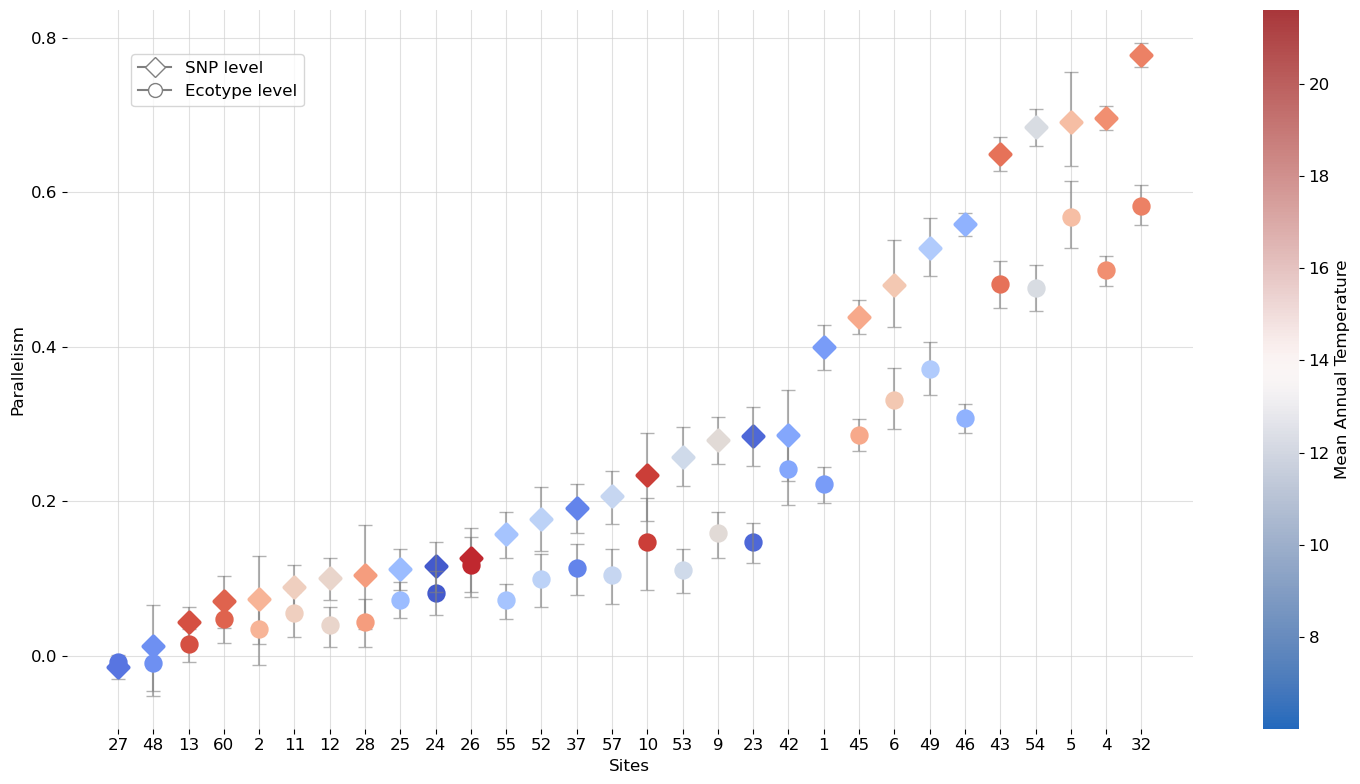

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

data_sorted_snp = data_sorted[data_sorted['source'] == 'snp']
data_sorted_ecotype = data_sorted[data_sorted['source'] == 'ecotype']

# Set the figure size
font_size = 12
s_small = 60
s_big = 130

plt.figure(figsize=(15, 8))

plt.rcParams['axes.axisbelow'] = True

# Create the pointplot for SNPs
sns.pointplot(
    data=data_sorted_snp, 
    x='site', 
    y='mean', 
    hue='bio1', 
    palette='coolwarm',  # Use color map for bio1
    join=False,  # Don't connect points with a line
    markers="D",  # Use diamonds for SNPs
    capsize=0.1,  # Add small caps to indicate error bars
    errwidth=1,  # Error bar width
    errorbar=None,  # We will add our custom error bars manually
    scale=1.5
)

# Create the pointplot for Ecotypes
sns.pointplot(
    data=data_sorted_ecotype, 
    x='site', 
    y='mean', 
    hue='bio1', 
    palette='coolwarm',  # Use color map for bio1
    join=False,  # Don't connect points with a line
    markers='o',  # Use circles for Ecotypes
    capsize=0.1,  # Add small caps to indicate error bars
    errwidth=1,  # Error bar width
    errorbar=None,  # We will add our custom error bars manually
    scale=1.5
)

# Add custom error bars based on 'site' values
unique_sites = data_sorted['site'].cat.codes  # Get the positions of the sites in the categorical axis

for i in range(len(data_sorted)):
    plt.errorbar(
        x=unique_sites[i],  # Use the correct x-position for the site
        y=data_sorted['mean'].iloc[i], 
        yerr=[[data_sorted['mean'].iloc[i] - data_sorted['lower'].iloc[i]], [data_sorted['upper'].iloc[i] - data_sorted['mean'].iloc[i]]], 
        fmt='none', capsize=5, color='grey', alpha=0.6
    )

# Labels
plt.ylabel('Parallelism')
plt.xlabel('Sites')

# Custom font size
plt.rc('font', family='sans-serif', size=font_size, weight='normal')  # Regular font size
plt.rc('axes', titlesize=font_size, labelsize=font_size)  # Title and label size for axes
plt.rc('xtick', labelsize=font_size)  # X tick labels size
plt.rc('ytick', labelsize=font_size)  # Y tick labels size

# Define dark grey color for spines
dark_grey = '#4D4D4D'

# Apply to spines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
#plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors
plt.grid(True, color='lightgrey', alpha=0.7)

# Create custom legend with marker shapes and adjust the position slightly to the lower right
snp_legend = Line2D([0], [0], marker='D', color='grey', label='SNP level', markerfacecolor='white', markersize=10)
ecotype_legend = Line2D([0], [0], marker='o', color='grey', label='Ecotype level', markerfacecolor='white', markersize=10)
plt.legend(handles=[snp_legend, ecotype_legend], loc='upper left', bbox_to_anchor=(0.05, 0.95))  # Adjusted position

# Add color bar for bio1 without black margins
norm = plt.Normalize(data_sorted['bio1'].min(), data_sorted['bio1'].max())
sm = plt.cm.ScalarMappable(cmap='vlag', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label='Mean Annual Temperature')

# Remove black margins from the color bar
cbar.outline.set_edgecolor('none')

# Adjust the layout and show the plot
plt.tight_layout()
plt.savefig('parallelism.png')
plt.savefig('parallelism.svg')
plt.show()
